In [3]:
# Importing necessary libraries
# We will importing more - as per our needs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading and preprocessing the data
train_df = pd.read_csv('/Users/arush/Desktop/sem 2/Deep learning/assignment 2/ag_news_csv/train.csv', header=None, names=['class_index', 'title', 'description'])
test_df = pd.read_csv('/Users/arush/Desktop/sem 2/Deep learning/assignment 2/ag_news_csv/test.csv', header=None, names=['class_index', 'title', 'description'])

In [5]:
# Lets have a look into the dataset components
train_df.head()

,class_index,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
test_df.head()

,class_index,title,description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [7]:
# Printing main statistics about the dataset
print("Train Dataset Statistics:")
print(train_df.describe())
print("\n")
print("\nTest Dataset Statistics:")
print(test_df.describe())

Train Dataset Statistics:
         class_index
count  120000.000000
mean        2.500000
std         1.118039
min         1.000000
25%         1.750000
50%         2.500000
75%         3.250000
max         4.000000



Test Dataset Statistics:
       class_index
count  7600.000000
mean      2.500000
std       1.118108
min       1.000000
25%       1.750000
50%       2.500000
75%       3.250000
max       4.000000


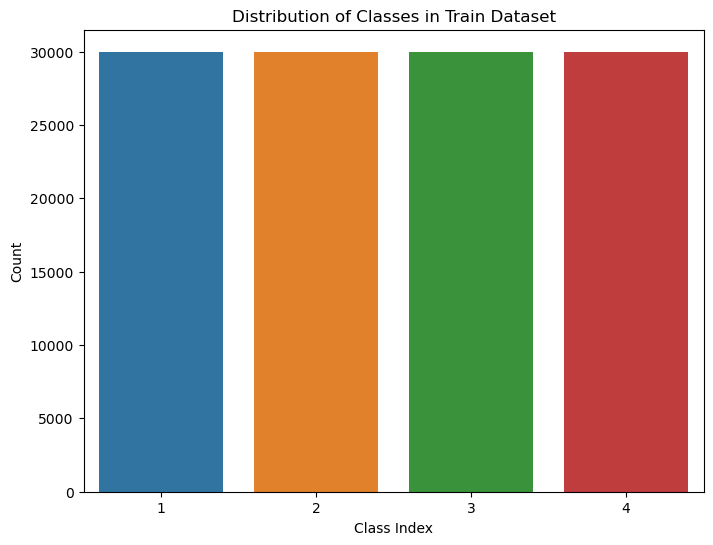

In [8]:
# Creating informative visualizations

'''
Distribution of classes - in Train Dataset Component
'''
plt.figure(figsize=(8, 6))
sns.countplot(x='class_index', data=train_df)
plt.title('Distribution of Classes in Train Dataset')
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.show()

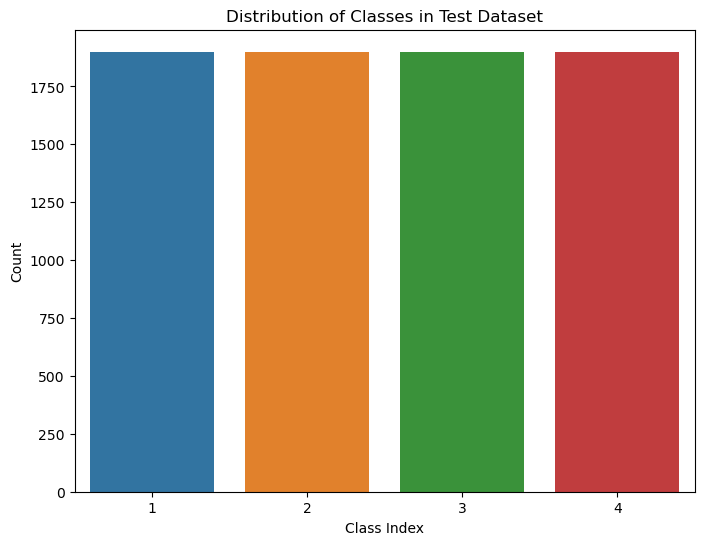

In [9]:
'''
Distribution of classes - in Test Dataset Component
'''
plt.figure(figsize=(8, 6))
sns.countplot(x='class_index', data=test_df)
plt.title('Distribution of Classes in Test Dataset')
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.show()

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/arush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

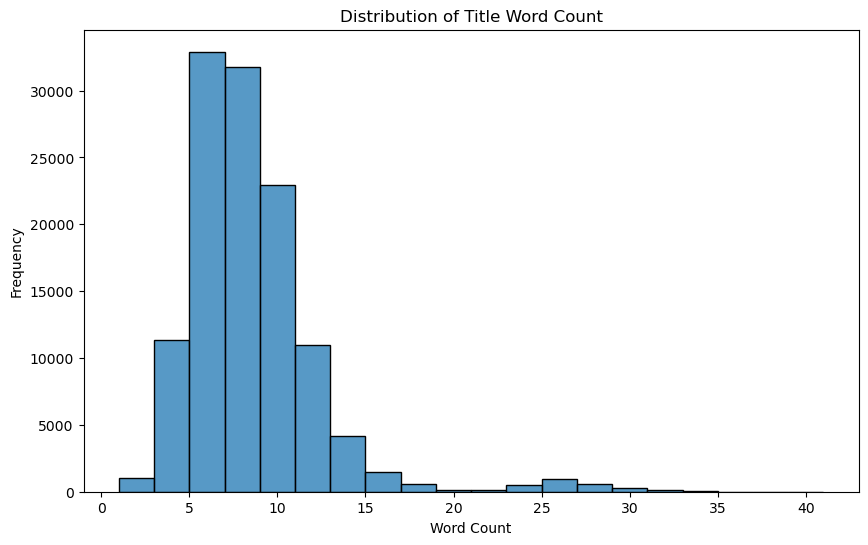

In [11]:
'''
Word count distribution - Training Component
'''

from nltk.tokenize import word_tokenize

train_df['title_word_count'] = train_df['title'].apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['title_word_count'], bins=20)
plt.title('Distribution of Title Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

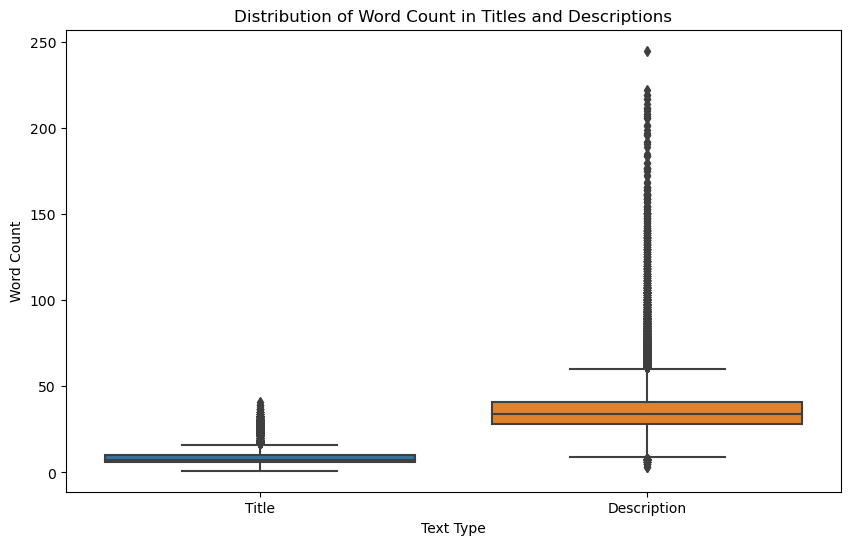

In [12]:
'''
Distribution of word count in titles and descriptions using a box plot - Training Component
'''

# Calculating word count for descriptions if not already calculated
if 'description_word_count' not in train_df:
    train_df['description_word_count'] = train_df['description'].apply(lambda x: len(word_tokenize(x)))

# Distribution of word count in titles and descriptions using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[['title_word_count', 'description_word_count']])
plt.title('Distribution of Word Count in Titles and Descriptions')
plt.xlabel('Text Type')
plt.ylabel('Word Count')
plt.xticks([0, 1], ['Title', 'Description'])
plt.show()

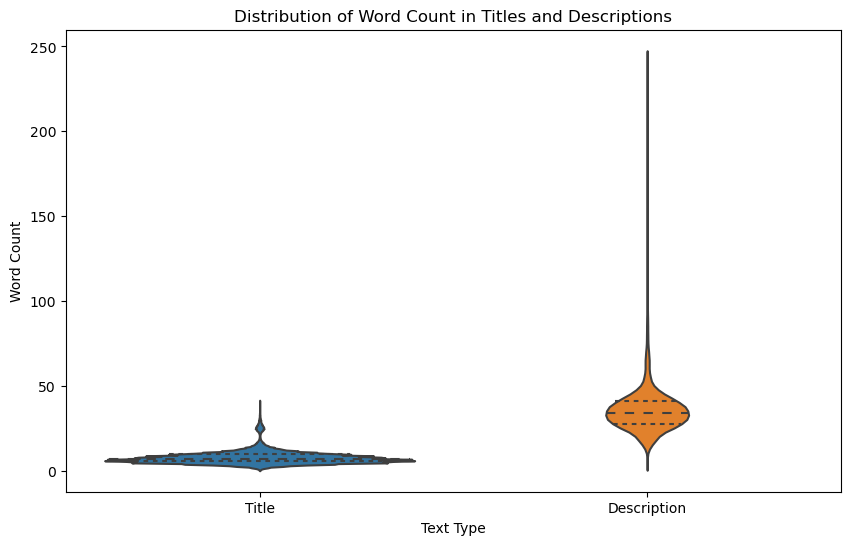

In [13]:
'''
Distribution of word count in titles and descriptions using a violin plot
'''
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df[['title_word_count', 'description_word_count']], inner='quartile')
plt.title('Distribution of Word Count in Titles and Descriptions')
plt.xlabel('Text Type')
plt.ylabel('Word Count')
plt.xticks([0, 1], ['Title', 'Description'])
plt.show()

In [14]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

# Defining function for text cleaning and preprocessing
def preprocess_text(text):
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Converting to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

[nltk_data] Downloading package stopwords to /Users/arush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Columns in train_df
train_df.columns

Index(['class_index', 'title', 'description', 'title_word_count',
       'description_word_count'],
      dtype='object')

In [16]:
# Columns in test_df
test_df.columns

Index(['class_index', 'title', 'description'], dtype='object')

In [17]:
# Removing unncessary columns (from train_df) - that were created
# for the sake of showing valuable graphs

train_df = train_df.drop(columns = ['title_word_count', 'description_word_count'])

In [18]:
train_df.columns

Index(['class_index', 'title', 'description'], dtype='object')

In [19]:
# Applying preprocessing to title and description columns - train_df
train_df['title'] = train_df['title'].apply(preprocess_text)
train_df['description'] = train_df['description'].apply(preprocess_text)

In [20]:
# Applying preprocessing to title and description columns - test_df
test_df['title'] = test_df['title'].apply(preprocess_text)
test_df['description'] = test_df['description'].apply(preprocess_text)

In [21]:
# Vocabulary building - train_df

# Building vocabulary from all unique tokens
vocabulary_train = set()
for _, row in train_df.iterrows():
    vocabulary_train.update(row['title'])
    vocabulary_train.update(row['description'])

print("Vocabulary size:", len(vocabulary_train))

Vocabulary size: 102016


In [22]:
# Vocabulary building - test_df

# Building vocabulary from all unique tokens
vocabulary_test = set()
for _, row in test_df.iterrows():
    vocabulary_test.update(row['title'])
    vocabulary_test.update(row['description'])

print("Vocabulary size:", len(vocabulary_test))

Vocabulary size: 25740


In [23]:
train_df.head()

,class_index,title,description
0,3,"[wall, st, bears, claw, back, black, reuters]","[reuters, shortsellers, wall, streets, dwindli..."
1,3,"[carlyle, looks, toward, commercial, aerospace...","[reuters, private, investment, firm, carlyle, ..."
2,3,"[oil, economy, cloud, stocks, outlook, reuters]","[reuters, soaring, crude, prices, plus, worrie..."
3,3,"[iraq, halts, oil, exports, main, southern, pi...","[reuters, authorities, halted, oil, exportflow..."
4,3,"[oil, prices, soar, alltime, record, posing, n...","[afp, tearaway, world, oil, prices, toppling, ..."


In [24]:
test_df.head()

,class_index,title,description
0,3,"[fears, n, pension, talks]","[unions, representing, workers, turner, newall..."
1,4,"[race, second, private, team, sets, launch, da...","[spacecom, toronto, canada, secondteam, rocket..."
2,4,"[ky, company, wins, grant, study, peptides, ap]","[ap, company, founded, chemistry, researcher, ..."
3,4,"[prediction, unit, helps, forecast, wildfires,...","[ap, barely, dawn, mike, fitzpatrick, starts, ..."
4,4,"[calif, aims, limit, farmrelated, smog, ap]","[ap, southern, californias, smogfighting, agen..."


In [25]:
# Numerical representation - train_df

import spacy

# Loading the spaCy model with GloVe vectors
nlp = spacy.load('en_core_web_md')


# Converting tokens into numerical representations
# token_vectors = [nlp(token).vector for token in train_df['title']]

# Defining a function to process text in chunks
def process_text_chunks(text, chunk_size=1000000):
    # Splitting the text into chunks of maximum length
    text_chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    # Processing each chunk with spaCy and concatenate the results
    processed_chunks = [nlp(chunk) for chunk in text_chunks]
    return processed_chunks

# Joining tokens into a single string for each row in the 'title' column
train_df['title_text'] = train_df['title'].apply(lambda x: ' '.join(x))
test_df['title_text'] = test_df['title'].apply(lambda x: ' '.join(x))

# Processing the text with spaCy in chunks
processed_chunks_train = process_text_chunks(train_df['title_text'].str.cat(sep=' '))
processed_chunks_test = process_text_chunks(test_df['title_text'].str.cat(sep=' '))

# Getting the vector representation for each token in all chunks
token_vectors_train = [token.vector for chunk in processed_chunks_train for token in chunk]
token_vectors_test = [token.vector for chunk in processed_chunks_test for token in chunk]

In [26]:
train_df.head()

,class_index,title,description,title_text
0,3,"[wall, st, bears, claw, back, black, reuters]","[reuters, shortsellers, wall, streets, dwindli...",wall st bears claw back black reuters
1,3,"[carlyle, looks, toward, commercial, aerospace...","[reuters, private, investment, firm, carlyle, ...",carlyle looks toward commercial aerospace reuters
2,3,"[oil, economy, cloud, stocks, outlook, reuters]","[reuters, soaring, crude, prices, plus, worrie...",oil economy cloud stocks outlook reuters
3,3,"[iraq, halts, oil, exports, main, southern, pi...","[reuters, authorities, halted, oil, exportflow...",iraq halts oil exports main southern pipeline ...
4,3,"[oil, prices, soar, alltime, record, posing, n...","[afp, tearaway, world, oil, prices, toppling, ...",oil prices soar alltime record posing new mena...


In [27]:
# Applying the same to "description" attribute

# Joining tokens into a single string for each row in the 'description' column
train_df['description_text'] = train_df['description'].apply(lambda x: ' '.join(x))
test_df['description_text'] = test_df['description'].apply(lambda x: ' '.join(x))

# Processing the text with spaCy in chunks
processed_chunks_train = process_text_chunks(train_df['description_text'].str.cat(sep=' '))
processed_chunks_test = process_text_chunks(test_df['description_text'].str.cat(sep=' '))

# Getting the vector representation for each token in all chunks
token_vectors_train = [token.vector for chunk in processed_chunks_train for token in chunk]
token_vectors_test = [token.vector for chunk in processed_chunks_test for token in chunk]

In [28]:
train_df = train_df.drop(columns = ["title", "description"])
test_df = test_df.drop(columns = ["title", "description"])

In [29]:
# Renaming columns
train_df = train_df.rename(columns={'title_text': 'title', 'description_text': 'description'})
test_df = test_df.rename(columns={'title_text': 'title', 'description_text': 'description'})

In [30]:
train_df.head()

,class_index,title,description
0,3,wall st bears claw back black reuters,reuters shortsellers wall streets dwindlingban...
1,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle groupw...
2,3,oil economy cloud stocks outlook reuters,reuters soaring crude prices plus worriesabout...
3,3,iraq halts oil exports main southern pipeline ...,reuters authorities halted oil exportflows mai...
4,3,oil prices soar alltime record posing new mena...,afp tearaway world oil prices toppling records...


In [31]:
test_df.head()

,class_index,title,description
0,3,fears n pension talks,unions representing workers turner newall say ...
1,4,race second private team sets launch date huma...,spacecom toronto canada secondteam rocketeers ...
2,4,ky company wins grant study peptides ap,ap company founded chemistry researcher univer...
3,4,prediction unit helps forecast wildfires ap,ap barely dawn mike fitzpatrick starts shift b...
4,4,calif aims limit farmrelated smog ap,ap southern californias smogfighting agency we...


In [114]:
#Importing necessary libraries
import tensorflow as tf
import keras
from keras import ops
from keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers

In [33]:
#Creating a master dataframe to join the test and train csv files into one df
master_df_texts = train_df['title'] + train_df['description']
master_df_labels = train_df['class_index']

test_df_texts = test_df['title'] + test_df['description']
test_df_labels = test_df['class_index']

#Creating different df for text and label
master_df_texts = master_df_texts.append(test_df_texts, ignore_index=True)
master_df_labels = master_df_labels.append(test_df_labels, ignore_index=True)

/var/folders/sp/gvgc0ph919g8hm2sxfb4hj2r0000gn/T/ipykernel_40959/2850396363.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df_texts = master_df_texts.append(test_df_texts, ignore_index=True)
/var/folders/sp/gvgc0ph919g8hm2sxfb4hj2r0000gn/T/ipykernel_40959/2850396363.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df_labels = master_df_labels.append(test_df_labels, ignore_index=True)


In [60]:
# Splitting the combined data into training, validation, and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(master_df_texts, master_df_labels, test_size=0.10, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.111, random_state=42)

print("Training samples:", len(train_texts))
print("Validation samples:", len(val_texts))
print("Testing samples:", len(test_texts))

Training samples: 102092
Validation samples: 12748
Testing samples: 12760


In [61]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [63]:
#Creating the transformer block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [64]:
class TransformerEncoder(layers.Layer):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, rate=0):
        super().__init__()
        self.embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)]
        self.dropout = layers.Dropout(rate)

    def call(self, inputs):
        x = self.embedding_layer(inputs)
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        return self.dropout(x)

In [65]:
class TransformerClassifier(tf.keras.Model):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, num_classes, rate=0):
        super().__init__()
        self.encoder = TransformerEncoder(num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, rate)
        self.output_layer = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.encoder(inputs)
        x = tf.reduce_mean(x, axis=1) #Global average pooling
        return self.output_layer(x)

In [66]:
# Converting labels to numpy arrays
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [67]:
# Making labels 0 indexed for function sparse_categorical_crossentropy
train_labels -= 1
val_labels -= 1
test_labels -= 1

In [68]:
#Tokenizing text and creating x_train, x_val
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
# maxlen = max(len(tokens) for tokens in train_texts)
x_train = pad_sequences(tokenizer.texts_to_sequences(train_texts), maxlen=maxlen)
x_val = pad_sequences(tokenizer.texts_to_sequences(val_texts), maxlen=maxlen)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=maxlen)

In [69]:
# Defining parameters of our model
embed_dim = 32  
num_heads = 2   
ff_dim = 32  
num_classes = 4
num_layers = 4

In [70]:
#Instantiaing the model
model_base = TransformerClassifier(num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, num_classes)

In [126]:
model_base.summary()

Model: "transformer_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ transformer_encoder_2           │ ?                      │     5,299,872 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,900,014 (60.65 MB)

 Trainable params: 5,300,004 (20.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,600,010 (40.44 MB)

In [72]:
# Defining the learning rate
learning_rate = 0.001

# Defining the loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compiling the model
model_base.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [73]:
# Defining lists to store metrics
train_loss_base = []
train_accuracy_base = []
val_loss_base = []
val_accuracy_base = []

num_epochs_base = 3
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, train_labels)).shuffle(len(x_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, val_labels)).batch(batch_size)

# Training loop
for epoch in range(num_epochs_base):
    print(f"Epoch {epoch + 1}/{num_epochs_base}")
    
    # Training
    train_loss_epoch = []
    train_accuracy_epoch = []
    for x_batch, y_batch in train_dataset:
        # Forward pass
        with tf.GradientTape() as tape:
            predictions = model_base(x_batch, training=True)  # Pass the input data
            loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch, predictions)
            loss = tf.reduce_mean(loss)
        
        # Calculating gradients
        gradients = tape.gradient(loss, model_base.trainable_variables)
        
        # Updating parameters
        optimizer.apply_gradients(zip(gradients, model_base.trainable_variables))
        
        # Computing training accuracy
        train_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch, predictions))
        
        # Appending training loss and accuracy to epoch lists
        train_loss_epoch.append(loss.numpy())
        train_accuracy_epoch.append(train_accuracy.numpy())
    
    # Computing average training loss and accuracy for the epoch
    avg_train_loss = np.mean(train_loss_epoch)
    avg_train_accuracy = np.mean(train_accuracy_epoch)
    
    # Appending epoch training loss and accuracy to history
    train_loss_base.append(avg_train_loss)
    train_accuracy_base.append(avg_train_accuracy)
    
    # Printing epoch training loss and accuracy
    print(f"Training Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_accuracy:.4f}")
    
    # Validation
    val_loss_epoch = []
    val_accuracy_epoch = []
    for x_batch_val, y_batch_val in val_dataset:
        # Forward pass
        val_predictions = model_base(x_batch_val, training=False)
        val_loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch_val, val_predictions)
        val_loss = tf.reduce_mean(val_loss)
        
        # Computing validation accuracy
        val_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch_val, val_predictions))
        
        # Appending validation loss and accuracy to epoch lists
        val_loss_epoch.append(val_loss.numpy())
        val_accuracy_epoch.append(val_accuracy.numpy())
    
    # Computing average validation loss and accuracy for the epoch
    avg_val_loss = np.mean(val_loss_epoch)
    avg_val_accuracy = np.mean(val_accuracy_epoch)
    
    # Appending epoch validation loss and accuracy to history
    val_loss_base.append(avg_val_loss)
    val_accuracy_base.append(avg_val_accuracy)
    
    # Printing epoch validation loss and accuracy
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {avg_val_accuracy:.4f}")

Epoch 1/3


2024-04-10 01:39:37.149332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.3296, Accuracy: 0.8829


2024-04-10 01:39:53.550525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss: 0.2628, Accuracy: 0.9110
Epoch 2/3


2024-04-10 01:50:27.209019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.1131, Accuracy: 0.9626


2024-04-10 01:50:43.515392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss: 0.3523, Accuracy: 0.8915
Epoch 3/3


2024-04-10 02:01:19.614070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.0518, Accuracy: 0.9825
Validation Loss: 0.4138, Accuracy: 0.8827


2024-04-10 02:01:36.337391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [76]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, test_labels)).batch(batch_size)

# Testing loop
test_loss_epoch = []
test_accuracy_epoch = []
for x_batch_test, y_batch_test in test_dataset:
    # Forward pass
    test_predictions = model_base(x_batch_test, training=False)
    test_loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch_test, test_predictions)
    test_loss = tf.reduce_mean(test_loss)
    
    # Computing test accuracy
    test_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch_test, test_predictions))
    
    # Appending test loss and accuracy to epoch lists
    test_loss_epoch.append(test_loss.numpy())
    test_accuracy_epoch.append(test_accuracy.numpy())

# Computing average test loss and accuracy for the entire test set
avg_test_loss = np.mean(test_loss_epoch)
avg_test_accuracy = np.mean(test_accuracy_epoch)

# Printing test loss and accuracy
print(f"Test Loss: {avg_test_loss:.4f}, Accuracy: {avg_test_accuracy:.4f}")

Test Loss: 0.4291, Accuracy: 0.8792


2024-04-10 02:01:53.539166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [79]:
#Saving weights
model_base.save_weights('model_base.weights.h5')

In [80]:
# Printing training, validation, and test values
print("Training Loss:", train_loss_base[-1])
print("Training Accuracy:", train_accuracy_base[-1])
print("Validation Loss:", val_loss_base[-1])
print("Validation Accuracy:", val_accuracy_base[-1])
print("Test Loss:", avg_test_loss)
print("Test Accuracy:", avg_test_accuracy)

Training Loss: 0.05177782
Training Accuracy: 0.9824996
Validation Loss: 0.41383818
Validation Accuracy: 0.8827015
Test Loss: 0.42910457
Test Accuracy: 0.87920326


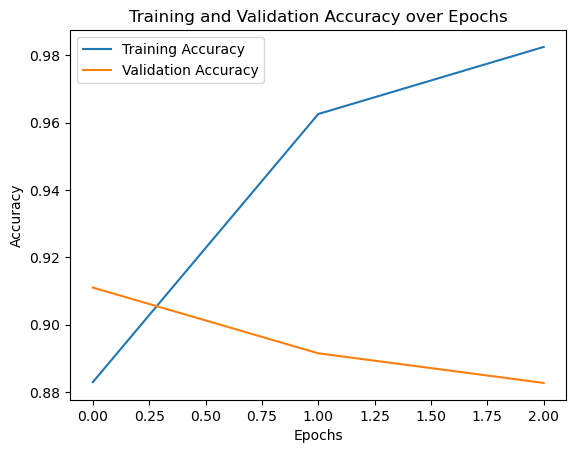

In [81]:
#Plot for training and validation accuracy 
plt.plot(train_accuracy_base, label='Training Accuracy')
plt.plot(val_accuracy_base, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

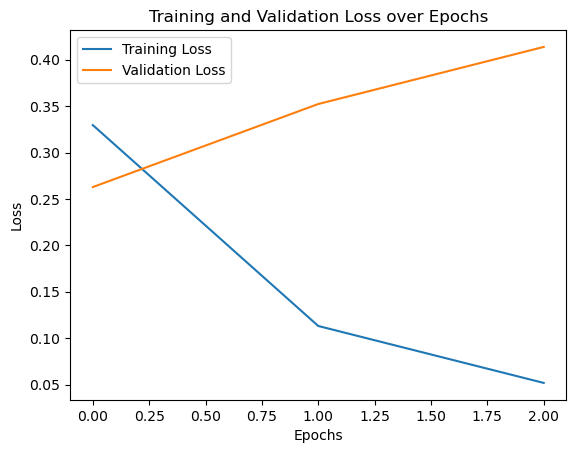

In [82]:
#Plot for training and validation loss 
plt.plot(train_loss_base, label='Training Loss')
plt.plot(val_loss_base, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step


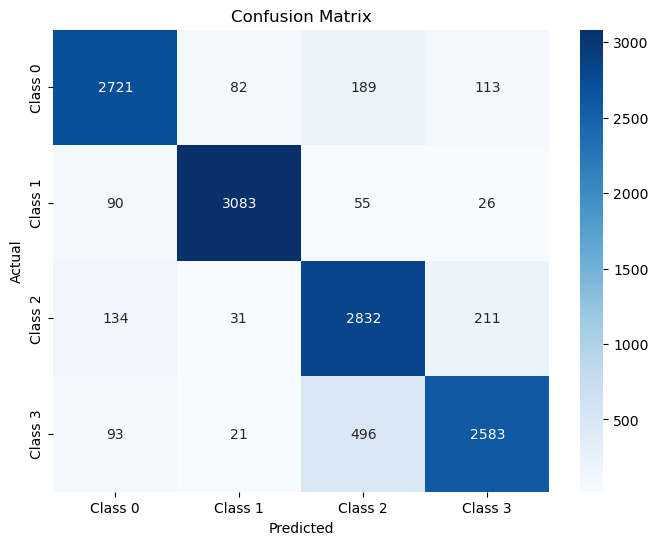

In [84]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

#Storing test predictions
y_pred_test = np.argmax(model_base.predict(x_test), axis=1)

# Generating confusion matrix
cm = confusion_matrix(test_labels, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [85]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_test, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8820415502823976
Recall: 0.8792319749216301
F1 Score: 0.8796152479863543


399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step


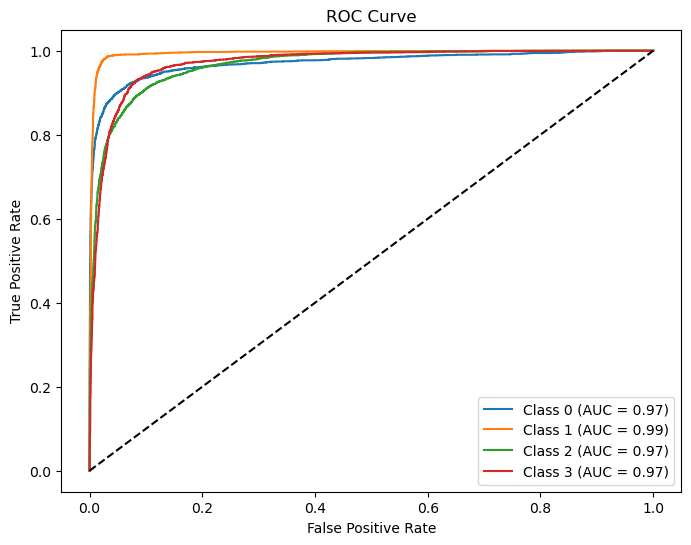

In [86]:
from sklearn.metrics import roc_curve, auc

# Getting probabilities for each class
y_probs_test = model_base.predict(x_test)

# Finding ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels, y_probs_test[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hyperparameter tuning

## Changing learning rate

In [87]:
#Instantiaing the model
model_lr = TransformerClassifier(num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, num_classes)

In [88]:
# Defining the learning rate
learning_rate = 0.0035

# Defining the loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compiling the model
model_lr.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [127]:
model_lr.summary()

Model: "transformer_classifier_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ transformer_encoder_3           │ ?                      │     5,299,872 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,900,014 (60.65 MB)

 Trainable params: 5,300,004 (20.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,600,010 (40.44 MB)

In [89]:
# Defining lists to store metrics
train_loss_lr = []
train_accuracy_lr = []
val_loss_lr = []
val_accuracy_lr = []

num_epochs_lr = 3
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, train_labels)).shuffle(len(x_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, val_labels)).batch(batch_size)

# Training loop
for epoch in range(num_epochs_lr):
    print(f"Epoch {epoch + 1}/{num_epochs_lr}")
    
    # Training
    train_loss_epoch = []
    train_accuracy_epoch = []
    for x_batch, y_batch in train_dataset:
        # Forward pass
        with tf.GradientTape() as tape:
            predictions = model_lr(x_batch, training=True)  # Pass the input data
            loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch, predictions)
            loss = tf.reduce_mean(loss)
        
        # Calculating gradients
        gradients = tape.gradient(loss, model_lr.trainable_variables)
        
        # Updating parameters
        optimizer.apply_gradients(zip(gradients, model_lr.trainable_variables))
        
        # Computing training accuracy
        train_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch, predictions))
        
        # Appending training loss and accuracy to epoch lists
        train_loss_epoch.append(loss.numpy())
        train_accuracy_epoch.append(train_accuracy.numpy())
    
    # Computing average training loss and accuracy for the epoch
    avg_train_loss = np.mean(train_loss_epoch)
    avg_train_accuracy = np.mean(train_accuracy_epoch)
    
    # Appending epoch training loss and accuracy to history
    train_loss_lr.append(avg_train_loss)
    train_accuracy_lr.append(avg_train_accuracy)
    
    # Printing epoch training loss and accuracy
    print(f"Training Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_accuracy:.4f}")
    
    # Validation
    val_loss_epoch = []
    val_accuracy_epoch = []
    for x_batch_val, y_batch_val in val_dataset:
        # Forward pass
        val_predictions = model_lr(x_batch_val, training=False)
        val_loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch_val, val_predictions)
        val_loss = tf.reduce_mean(val_loss)
        
        # Computing validation accuracy
        val_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch_val, val_predictions))
        
        # Appending validation loss and accuracy to epoch lists
        val_loss_epoch.append(val_loss.numpy())
        val_accuracy_epoch.append(val_accuracy.numpy())
    
    # Computing average validation loss and accuracy for the epoch
    avg_val_loss = np.mean(val_loss_epoch)
    avg_val_accuracy = np.mean(val_accuracy_epoch)
    
    # Appending epoch validation loss and accuracy to history
    val_loss_lr.append(avg_val_loss)
    val_accuracy_lr.append(avg_val_accuracy)
    
    # Printing epoch validation loss and accuracy
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {avg_val_accuracy:.4f}")

Epoch 1/3


2024-04-10 03:10:01.834289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.3698, Accuracy: 0.8672


2024-04-10 03:10:18.169476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss: 0.2708, Accuracy: 0.9125
Epoch 2/3


2024-04-10 03:21:17.165952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.1764, Accuracy: 0.9442


2024-04-10 03:21:34.129933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss: 0.3038, Accuracy: 0.9081
Epoch 3/3


2024-04-10 03:32:39.673620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.1021, Accuracy: 0.9673
Validation Loss: 0.3504, Accuracy: 0.9017


2024-04-10 03:32:57.341573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [90]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, test_labels)).batch(batch_size)

# Testing loop
test_loss_epoch = []
test_accuracy_epoch = []
for x_batch_test, y_batch_test in test_dataset:
    # Forward pass
    test_predictions = model_lr(x_batch_test, training=False)
    test_loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch_test, test_predictions)
    test_loss = tf.reduce_mean(test_loss)
    
    # Computing test accuracy
    test_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch_test, test_predictions))
    
    # Appending test loss and accuracy to epoch lists
    test_loss_epoch.append(test_loss.numpy())
    test_accuracy_epoch.append(test_accuracy.numpy())

# Computing average test loss and accuracy for the entire test set
avg_test_loss = np.mean(test_loss_epoch)
avg_test_accuracy = np.mean(test_accuracy_epoch)

# Printing test loss and accuracy
print(f"Test Loss: {avg_test_loss:.4f}, Accuracy: {avg_test_accuracy:.4f}")

Test Loss: 0.3615, Accuracy: 0.8980


2024-04-10 03:33:16.193646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [91]:
#Saving weights
model_lr.save_weights('model_lr.weights.h5')

In [92]:
# Printing training, validation, and test values
print("Training Loss:", train_loss_lr[-1])
print("Training Accuracy:", train_accuracy_lr[-1])
print("Validation Loss:", val_loss_lr[-1])
print("Validation Accuracy:", val_accuracy_lr[-1])
print("Test Loss:", avg_test_loss)
print("Test Accuracy:", avg_test_accuracy)

Training Loss: 0.10209179
Training Accuracy: 0.9673104
Validation Loss: 0.35035205
Validation Accuracy: 0.90165514
Test Loss: 0.36148176
Test Accuracy: 0.8979741


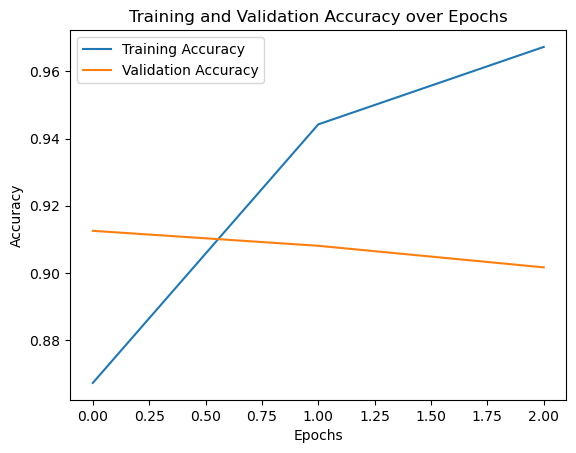

In [93]:
#Plot for training and validation accuracy 
plt.plot(train_accuracy_lr, label='Training Accuracy')
plt.plot(val_accuracy_lr, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

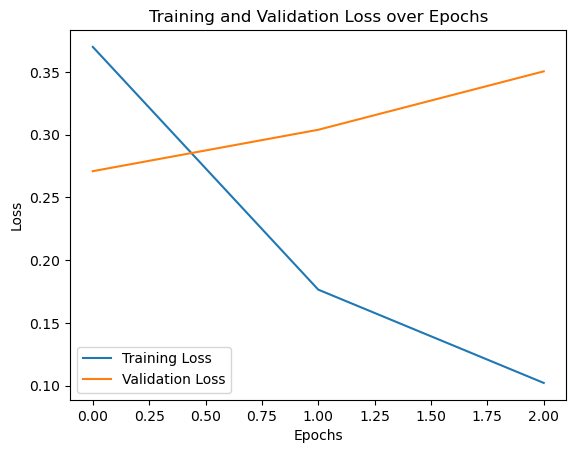

In [94]:
#Plot for training and validation loss 
plt.plot(train_loss_lr, label='Training Loss')
plt.plot(val_loss_lr, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step


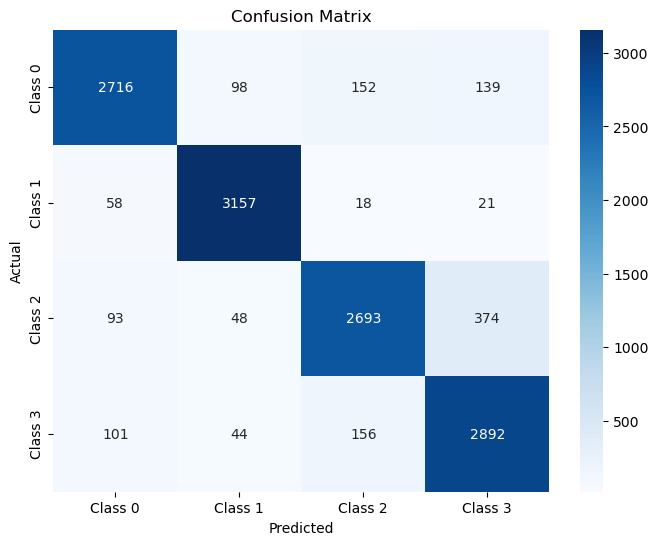

In [95]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

#Storing test predictions
y_pred_test = np.argmax(model_lr.predict(x_test), axis=1)

# Generating confusion matrix
cm = confusion_matrix(test_labels, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step


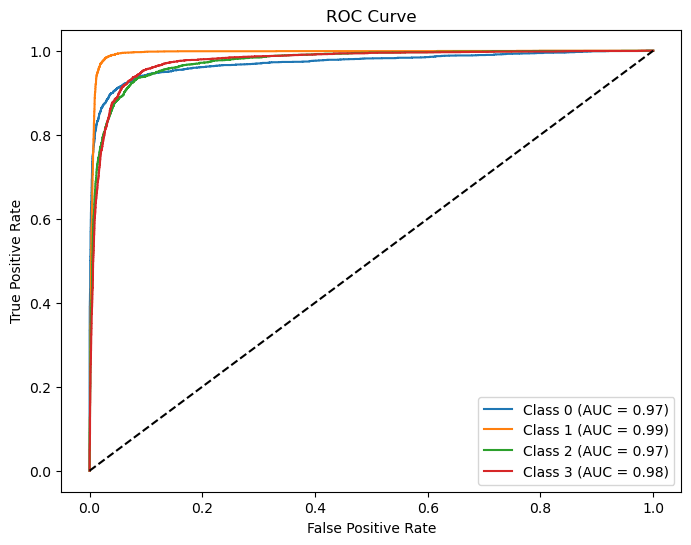

In [96]:
from sklearn.metrics import roc_curve, auc

# Getting probabilities for each class
y_probs_test = model_lr.predict(x_test)

# Finding ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels, y_probs_test[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Adding dropout

In [97]:
#Creating the transformer block
class TransformerBlockDropout(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.5):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [98]:
class TransformerEncoderDropout(layers.Layer):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, rate=0):
        super().__init__()
        self.embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
        self.transformer_blocks = [TransformerBlockDropout(embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)]
        self.dropout = layers.Dropout(rate)

    def call(self, inputs):
        x = self.embedding_layer(inputs)
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        return self.dropout(x)

In [99]:
class TransformerClassifierDropout(tf.keras.Model):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, num_classes, rate=0):
        super().__init__()
        self.encoder = TransformerEncoderDropout(num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, rate)
        self.output_layer = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.encoder(inputs)
        x = tf.reduce_mean(x, axis=1) #Global average pooling
        return self.output_layer(x)

In [100]:
#Instantiaing the model
model_dropout = TransformerClassifierDropout(num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, num_classes)

In [101]:
# Defining the learning rate
learning_rate = 0.001

# Defining the loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compiling the model
model_dropout.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [128]:
model_dropout.summary()

Model: "transformer_classifier_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ transformer_encoder_dropout     │ ?                      │     5,299,872 │
│ (TransformerEncoderDropout)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,900,014 (60.65 MB)

 Trainable params: 5,300,004 (20.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,600,010 (40.44 MB)

In [102]:
# Defining lists to store metrics
train_loss_dropout = []
train_accuracy_dropout = []
val_loss_dropout = []
val_accuracy_dropout = []

num_epochs_dropout = 3
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, train_labels)).shuffle(len(x_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, val_labels)).batch(batch_size)

# Training loop
for epoch in range(num_epochs_dropout):
    print(f"Epoch {epoch + 1}/{num_epochs_dropout}")
    
    # Training
    train_loss_epoch = []
    train_accuracy_epoch = []
    for x_batch, y_batch in train_dataset:
        # Forward pass
        with tf.GradientTape() as tape:
            predictions = model_dropout(x_batch, training=True)  # Pass the input data
            loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch, predictions)
            loss = tf.reduce_mean(loss)
        
        # Calculating gradients
        gradients = tape.gradient(loss, model_dropout.trainable_variables)
        
        # Updating parameters
        optimizer.apply_gradients(zip(gradients, model_dropout.trainable_variables))
        
        # Computing training accuracy
        train_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch, predictions))
        
        # Appending training loss and accuracy to epoch lists
        train_loss_epoch.append(loss.numpy())
        train_accuracy_epoch.append(train_accuracy.numpy())
    
    # Computing average training loss and accuracy for the epoch
    avg_train_loss = np.mean(train_loss_epoch)
    avg_train_accuracy = np.mean(train_accuracy_epoch)
    
    # Appending epoch training loss and accuracy to history
    train_loss_dropout.append(avg_train_loss)
    train_accuracy_dropout.append(avg_train_accuracy)
    
    # Printing epoch training loss and accuracy
    print(f"Training Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_accuracy:.4f}")
    
    # Validation
    val_loss_epoch = []
    val_accuracy_epoch = []
    for x_batch_val, y_batch_val in val_dataset:
        # Forward pass
        val_predictions = model_dropout(x_batch_val, training=False)
        val_loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch_val, val_predictions)
        val_loss = tf.reduce_mean(val_loss)
        
        # Computing validation accuracy
        val_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch_val, val_predictions))
        
        # Appending validation loss and accuracy to epoch lists
        val_loss_epoch.append(val_loss.numpy())
        val_accuracy_epoch.append(val_accuracy.numpy())
    
    # Computing average validation loss and accuracy for the epoch
    avg_val_loss = np.mean(val_loss_epoch)
    avg_val_accuracy = np.mean(val_accuracy_epoch)
    
    # Appending epoch validation loss and accuracy to history
    val_loss_dropout.append(avg_val_loss)
    val_accuracy_dropout.append(avg_val_accuracy)
    
    # Printing epoch validation loss and accuracy
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {avg_val_accuracy:.4f}")

Epoch 1/3


2024-04-10 03:44:42.690759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.3350, Accuracy: 0.8823


2024-04-10 03:44:58.673337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss: 0.2522, Accuracy: 0.9173
Epoch 2/3


2024-04-10 03:55:42.850964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.1223, Accuracy: 0.9589


2024-04-10 03:55:58.678052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss: 0.3687, Accuracy: 0.9007
Epoch 3/3


2024-04-10 04:06:32.494007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.0523, Accuracy: 0.9828
Validation Loss: 0.4030, Accuracy: 0.8931


2024-04-10 04:06:48.450513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [103]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, test_labels)).batch(batch_size)

# Testing loop
test_loss_epoch = []
test_accuracy_epoch = []
for x_batch_test, y_batch_test in test_dataset:
    # Forward pass
    test_predictions = model_dropout(x_batch_test, training=False)
    test_loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch_test, test_predictions)
    test_loss = tf.reduce_mean(test_loss)
    
    # Computing test accuracy
    test_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch_test, test_predictions))
    
    # Appending test loss and accuracy to epoch lists
    test_loss_epoch.append(test_loss.numpy())
    test_accuracy_epoch.append(test_accuracy.numpy())

# Computing average test loss and accuracy for the entire test set
avg_test_loss = np.mean(test_loss_epoch)
avg_test_accuracy = np.mean(test_accuracy_epoch)

# Printing test loss and accuracy
print(f"Test Loss: {avg_test_loss:.4f}, Accuracy: {avg_test_accuracy:.4f}")

Test Loss: 0.4008, Accuracy: 0.8929


2024-04-10 04:07:04.273908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [104]:
#Saving weights
model_dropout.save_weights('model_dropout.weights.h5')

In [105]:
# Printing training, validation, and test values
print("Training Loss:", train_loss_dropout[-1])
print("Training Accuracy:", train_accuracy_dropout[-1])
print("Validation Loss:", val_loss_dropout[-1])
print("Validation Accuracy:", val_accuracy_dropout[-1])
print("Test Loss:", avg_test_loss)
print("Test Accuracy:", avg_test_accuracy)

Training Loss: 0.052303527
Training Accuracy: 0.9827966
Validation Loss: 0.4030439
Validation Accuracy: 0.8930921
Test Loss: 0.40081084
Test Accuracy: 0.89285713


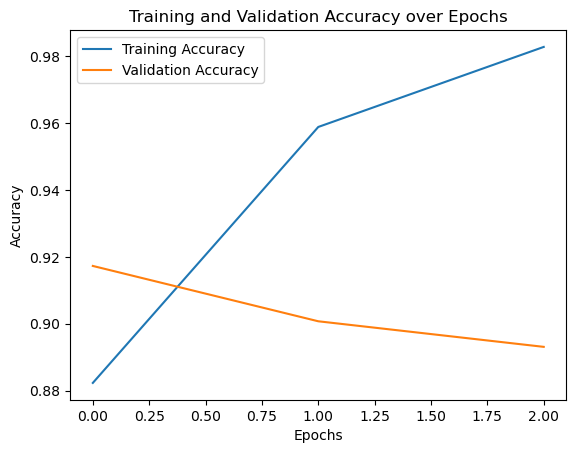

In [106]:
#Plot for training and validation accuracy 
plt.plot(train_accuracy_dropout, label='Training Accuracy')
plt.plot(val_accuracy_dropout, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

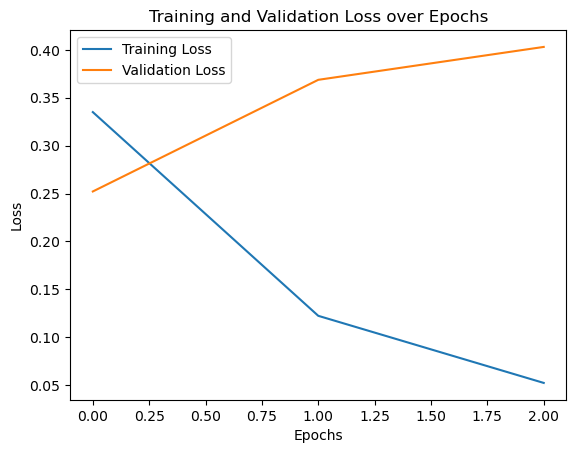

In [107]:
#Plot for training and validation loss 
plt.plot(train_loss_dropout, label='Training Loss')
plt.plot(val_loss_dropout, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


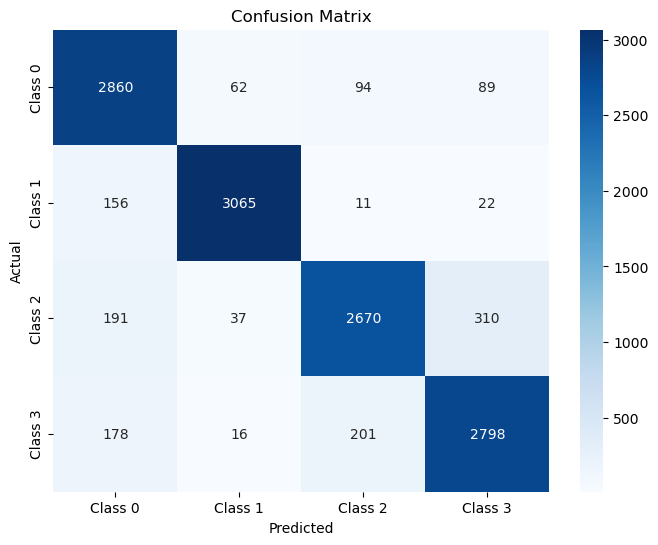

In [108]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

#Storing test predictions
y_pred_test = np.argmax(model_dropout.predict(x_test), axis=1)

# Generating confusion matrix
cm = confusion_matrix(test_labels, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step


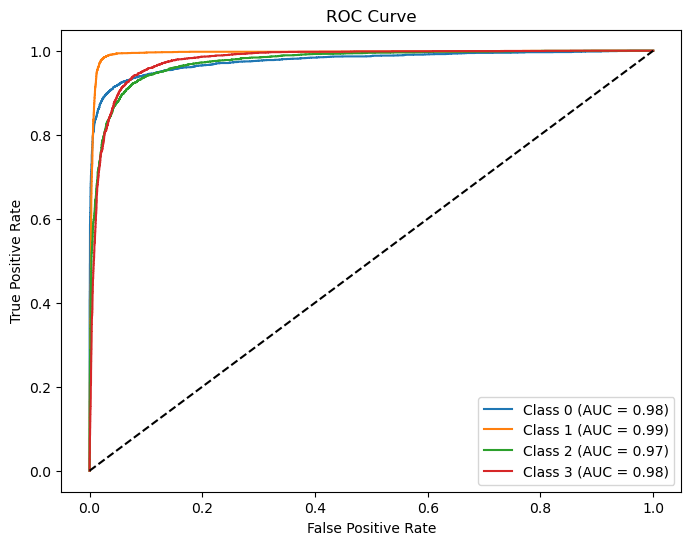

In [109]:
from sklearn.metrics import roc_curve, auc

# Getting probabilities for each class
y_probs_test = model_dropout.predict(x_test)

# Finding ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels, y_probs_test[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Adding l2 regularization

In [110]:
#Creating the transformer block
class TransformerBlockReg(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0, l2_reg=0.01):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu", kernel_regularizer=regularizers.l2(l2_reg)),
            layers.Dense(embed_dim, kernel_regularizer=regularizers.l2(l2_reg)),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [111]:
class TransformerEncoderReg(layers.Layer):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, rate=0):
        super().__init__()
        self.embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
        self.transformer_blocks = [TransformerBlockReg(embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)]
        self.dropout = layers.Dropout(rate)

    def call(self, inputs):
        x = self.embedding_layer(inputs)
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        return self.dropout(x)

In [115]:
class TransformerClassifierReg(tf.keras.Model):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, num_classes, rate=0, output_l2reg=0.01):
        super().__init__()
        self.encoder = TransformerEncoderReg(num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, rate)
        self.output_layer = layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(output_l2reg))

    def call(self, inputs):
        x = self.encoder(inputs)
        x = tf.reduce_mean(x, axis=1) #Global average pooling
        return self.output_layer(x)

In [116]:
#Instantiaing the model
model_reg = TransformerClassifierReg(num_layers, embed_dim, num_heads, ff_dim, maxlen, vocab_size, num_classes)

In [117]:
# Defining the learning rate
learning_rate = 0.001

# Defining the loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compiling the model
model_reg.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [129]:
model_reg.summary()

Model: "transformer_classifier_reg_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ transformer_encoder_reg_1       │ ?                      │     5,299,872 │
│ (TransformerEncoderReg)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ ?                      │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,900,014 (60.65 MB)

 Trainable params: 5,300,004 (20.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,600,010 (40.44 MB)

In [118]:
# Defining lists to store metrics
train_loss_reg = []
train_accuracy_reg = []
val_loss_reg = []
val_accuracy_reg = []

num_epochs_reg = 3
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, train_labels)).shuffle(len(x_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, val_labels)).batch(batch_size)

# Training loop
for epoch in range(num_epochs_reg):
    print(f"Epoch {epoch + 1}/{num_epochs_reg}")
    
    # Training
    train_loss_epoch = []
    train_accuracy_epoch = []
    for x_batch, y_batch in train_dataset:
        # Forward pass
        with tf.GradientTape() as tape:
            predictions = model_reg(x_batch, training=True)  # Pass the input data
            loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch, predictions)
            loss = tf.reduce_mean(loss)
        
        # Calculating gradients
        gradients = tape.gradient(loss, model_reg.trainable_variables)
        
        # Updating parameters
        optimizer.apply_gradients(zip(gradients, model_reg.trainable_variables))
        
        # Computing training accuracy
        train_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch, predictions))
        
        # Appending training loss and accuracy to epoch lists
        train_loss_epoch.append(loss.numpy())
        train_accuracy_epoch.append(train_accuracy.numpy())
    
    # Computing average training loss and accuracy for the epoch
    avg_train_loss = np.mean(train_loss_epoch)
    avg_train_accuracy = np.mean(train_accuracy_epoch)
    
    # Appending epoch training loss and accuracy to history
    train_loss_reg.append(avg_train_loss)
    train_accuracy_reg.append(avg_train_accuracy)
    
    # Printing epoch training loss and accuracy
    print(f"Training Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_accuracy:.4f}")
    
    # Validation
    val_loss_epoch = []
    val_accuracy_epoch = []
    for x_batch_val, y_batch_val in val_dataset:
        # Forward pass
        val_predictions = model_reg(x_batch_val, training=False)
        val_loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch_val, val_predictions)
        val_loss = tf.reduce_mean(val_loss)
        
        # Computing validation accuracy
        val_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch_val, val_predictions))
        
        # Appending validation loss and accuracy to epoch lists
        val_loss_epoch.append(val_loss.numpy())
        val_accuracy_epoch.append(val_accuracy.numpy())
    
    # Computing average validation loss and accuracy for the epoch
    avg_val_loss = np.mean(val_loss_epoch)
    avg_val_accuracy = np.mean(val_accuracy_epoch)
    
    # Appending epoch validation loss and accuracy to history
    val_loss_reg.append(avg_val_loss)
    val_accuracy_reg.append(avg_val_accuracy)
    
    # Printing epoch validation loss and accuracy
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {avg_val_accuracy:.4f}")

Epoch 1/3


2024-04-10 04:51:36.933586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.3363, Accuracy: 0.8798


2024-04-10 04:51:53.321993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss: 0.2488, Accuracy: 0.9151
Epoch 2/3


2024-04-10 05:02:17.439999: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.1165, Accuracy: 0.9611


2024-04-10 05:02:34.522405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss: 0.2973, Accuracy: 0.9048
Epoch 3/3


2024-04-10 05:12:56.740638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss: 0.0478, Accuracy: 0.9842
Validation Loss: 0.3640, Accuracy: 0.9048


2024-04-10 05:13:12.871641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [119]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, test_labels)).batch(batch_size)

# Testing loop
test_loss_epoch = []
test_accuracy_epoch = []
for x_batch_test, y_batch_test in test_dataset:
    # Forward pass
    test_predictions = model_reg(x_batch_test, training=False)
    test_loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch_test, test_predictions)
    test_loss = tf.reduce_mean(test_loss)
    
    # Computing test accuracy
    test_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(y_batch_test, test_predictions))
    
    # Appending test loss and accuracy to epoch lists
    test_loss_epoch.append(test_loss.numpy())
    test_accuracy_epoch.append(test_accuracy.numpy())

# Computing average test loss and accuracy for the entire test set
avg_test_loss = np.mean(test_loss_epoch)
avg_test_accuracy = np.mean(test_accuracy_epoch)

# Printing test loss and accuracy
print(f"Test Loss: {avg_test_loss:.4f}, Accuracy: {avg_test_accuracy:.4f}")

Test Loss: 0.3772, Accuracy: 0.9035


2024-04-10 05:13:28.879482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [120]:
#Saving weights
model_reg.save_weights('model_reg.weights.h5')

In [121]:
# Printing training, validation, and test values
print("Training Loss:", train_loss_reg[-1])
print("Training Accuracy:", train_accuracy_reg[-1])
print("Validation Loss:", val_loss_reg[-1])
print("Validation Accuracy:", val_accuracy_reg[-1])
print("Test Loss:", avg_test_loss)
print("Test Accuracy:", avg_test_accuracy)

Training Loss: 0.04776374
Training Accuracy: 0.9841645
Validation Loss: 0.36404464
Validation Accuracy: 0.90478796
Test Loss: 0.3772326
Test Accuracy: 0.9034827


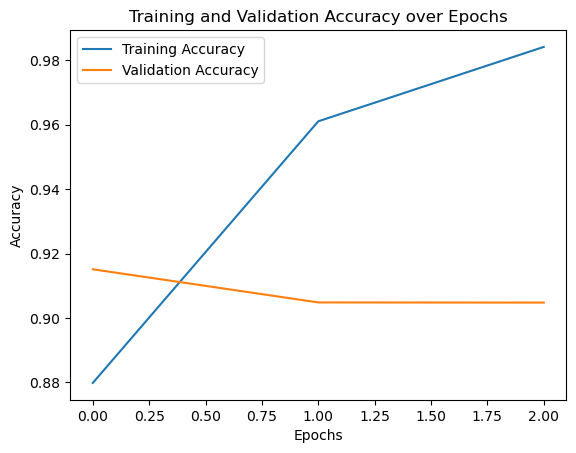

In [122]:
#Plot for training and validation accuracy 
plt.plot(train_accuracy_reg, label='Training Accuracy')
plt.plot(val_accuracy_reg, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

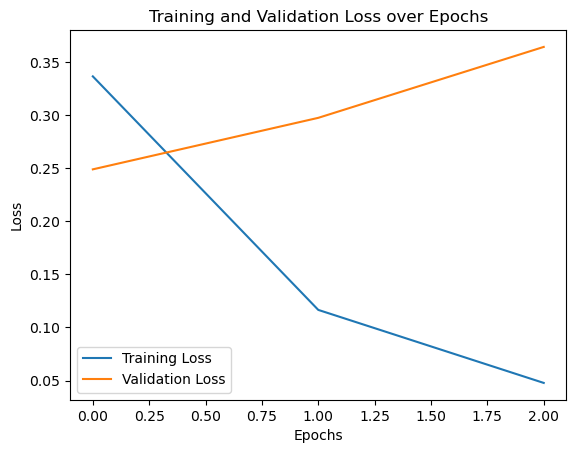

In [123]:
#Plot for training and validation loss 
plt.plot(train_loss_reg, label='Training Loss')
plt.plot(val_loss_reg, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step


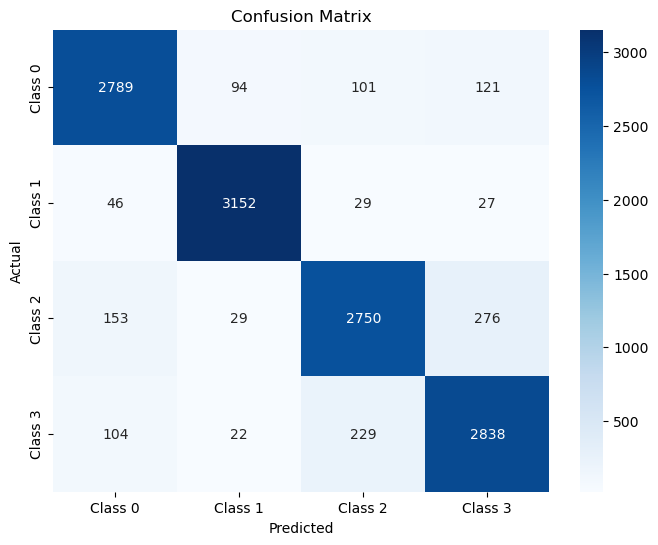

In [124]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

#Storing test predictions
y_pred_test = np.argmax(model_reg.predict(x_test), axis=1)

# Generating confusion matrix
cm = confusion_matrix(test_labels, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


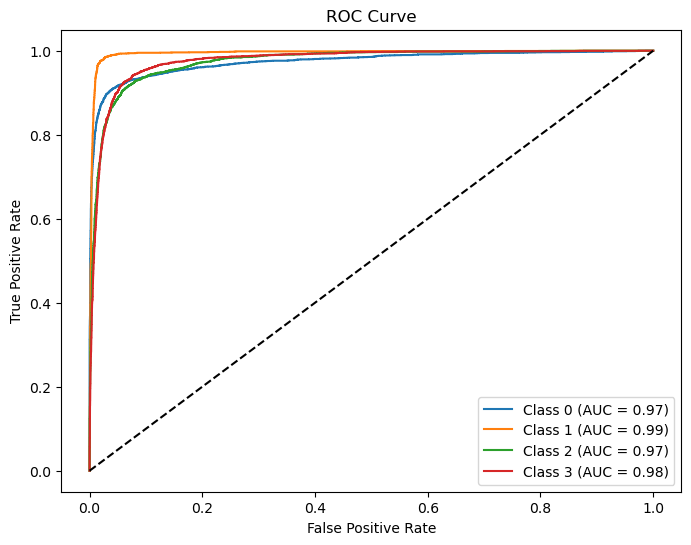

In [125]:
from sklearn.metrics import roc_curve, auc

# Getting probabilities for each class
y_probs_test = model_reg.predict(x_test)

# Finding ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels, y_probs_test[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()